In [10]:
import pencil as pc
import matplotlib.pyplot as plt
import modes
import os

In [24]:
path = './test/'

In [26]:
pathexists = os.path.exists(path)
if not pathexists:
    print(path + ' does not exist.')
    os.makedirs(path)
    print(path + ' is created.')

In [3]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['text.usetex'] = True

In [4]:
sim = pc.get_sim(quiet=True)
xyaver = pc.read.aver(plane_list=['xy'])
ts = pc.read.ts()
yaver = pc.read.aver(plane_list='y')

Read 3421 lines.


In [27]:
class Rms(modes.Modes):
    """
    Plot urms and brms as functions of 
    time from timeseries.dat.
    """
    def __init__(self, sim, ts, xyaver, yaver, ini=False, dyn=True):
        super().__init__(sim, ts, xyaver, yaver, ini=False, dyn=True)

        self.t = self.ts.t
        self.urms = self.ts.urms
        self.brms = self.ts.brms

    def plot(self, width, height):
        """
        width: width of the figure
        height: height of the figure
        """
        
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(width,height), sharex=True)
        ax1.plot(self.t, self.urms, alpha=0.6, c='k', ls=':', label=r'$u_{rms}$')
        ax1.legend(loc=4)
        ax1.set_ylabel(r"$u_{rms}$")
        
        ax2.plot(self.t, self.brms, alpha=0.6, c='k', ls=':', label=r'$b_{rms}$')
        ax2.set_yscale('log')
        ax2.set_xlim(self.t[0], self.t[-1])
        ax2.legend(loc=1)
        ax2.set_xlabel("t")
        ax2.set_ylabel(r"$b_{rms}$")

        plt.tight_layout()
        plt.savefig(path+'/rms.pdf',bbox_inches='tight',dpi=300)
        # plt.show()
        print()



    pass

In [28]:
rms = Rms(sim, ts, xyaver, yaver, ini=False, dyn=True)

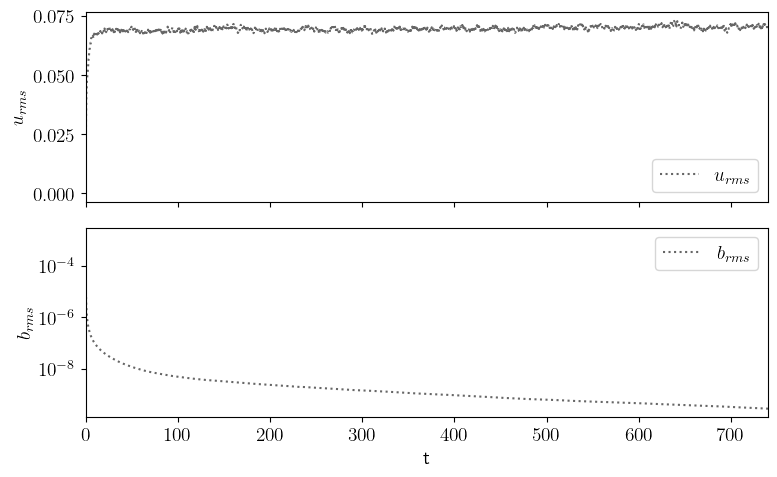

In [29]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,5), sharex=True)
rms.plot(8,5)